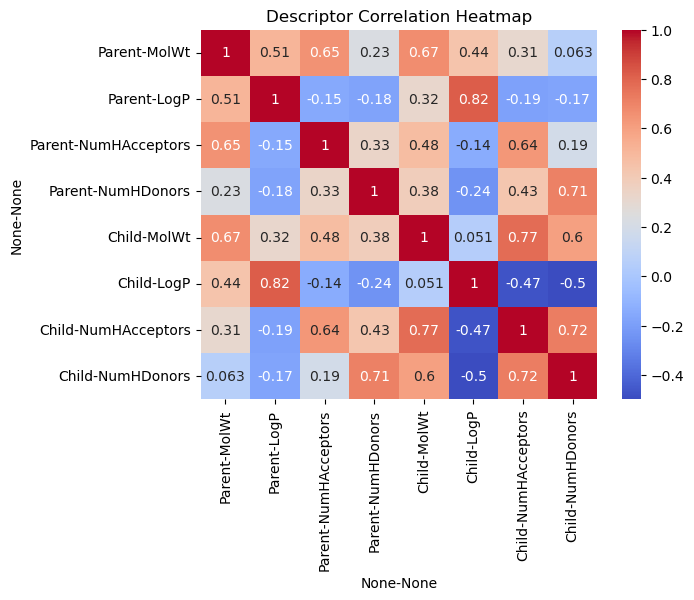

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_descriptors(smiles_list):
    data = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        descriptors = {
            "MolWt": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHAcceptors": Descriptors.NumHAcceptors(mol),
            "NumHDonors": Descriptors.NumHDonors(mol),
            #"NumHeavyAtoms": rdkit.Chem.rdMolDescriptors.CalcNumHeavyAtoms
        }
        data.append(descriptors)
    return pd.DataFrame(data)

def determine_descriptor_correlation(csv): 
    df = pd.read_csv(csv)
    parent_smiles = df["parent_smiles"]
    child_smiles = df["child_smiles"]

    parent_descriptors = calculate_descriptors(parent_smiles)
    child_descriptors = calculate_descriptors(child_smiles)

    combined_data = pd.concat([parent_descriptors, child_descriptors], axis=1, keys=['Parent', 'Child'])

    correlation_matrix = combined_data.corr()

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Descriptor Correlation Heatmap")
    plt.show()

data_file = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/metxbiodb_smiles_clean.csv'
determine_descriptor_correlation(data_file)


